In [1]:
import pandas as pd

Reading data from excel

In [2]:
undata_HDI=pd.read_excel("UNdata.xlsx",sheetname=0)

In [3]:
undata_cont=pd.read_excel("UNdata.xlsx", sheetname=5)

Merging data from HDI sheet and cont sheet

In [4]:
undata_final=pd.merge(undata_HDI,undata_cont,left_on=undata_HDI.iloc[:,0],right_on=undata_cont.iloc[:,0],how='inner')

Exploring data types to see is any variable has a wrong data type

In [5]:
undata_final.dtypes

country          object
HDI             float64
LifeExp         float64
Edu             float64
GNI_PC            int64
HDI_NI          float64
Country Name     object
CONTINENT        object
dtype: object

Changing data types as needed

In [6]:
undata_final.GNI_PC=undata_final.GNI_PC.astype('float64')

In [7]:
undata_final.country=undata_final.country.astype('category')

In [8]:
undata_final.CONTINENT=undata_final.CONTINENT.astype('category')

In [9]:
undata_final.dtypes

country         category
HDI              float64
LifeExp          float64
Edu              float64
GNI_PC           float64
HDI_NI           float64
Country Name      object
CONTINENT       category
dtype: object

Adding a new column 'Edulevel' which signifies Education level

In [10]:
undata_final['Edulevel']=undata_final['Edu'].astype('int64')

In [11]:
undata_final.dtypes

country         category
HDI              float64
LifeExp          float64
Edu              float64
GNI_PC           float64
HDI_NI           float64
Country Name      object
CONTINENT       category
Edulevel           int64
dtype: object

In [12]:
%matplotlib inline

In [13]:
import seaborn as sns

In [14]:
import numpy as np

In [15]:
undata_final.head()

,country,HDI,LifeExp,Edu,GNI_PC,HDI_NI,Country Name,CONTINENT,Edulevel
0,Australia,0.938,82.0,12.0,34340.0,0.978,Australia,Australia,12
1,Netherlands,0.921,80.8,11.6,37282.0,0.945,Netherlands,Europe,11
2,Germany,0.920,80.6,12.2,35431.0,0.948,Germany,Europe,12
3,Ireland,0.916,80.7,11.6,28671.0,0.960,Ireland,Europe,11
4,Sweden,0.916,81.6,11.7,36143.0,0.940,Sweden,Europe,11


<bound method Figure.show of <matplotlib.figure.Figure object at 0x000002847642FA90>>

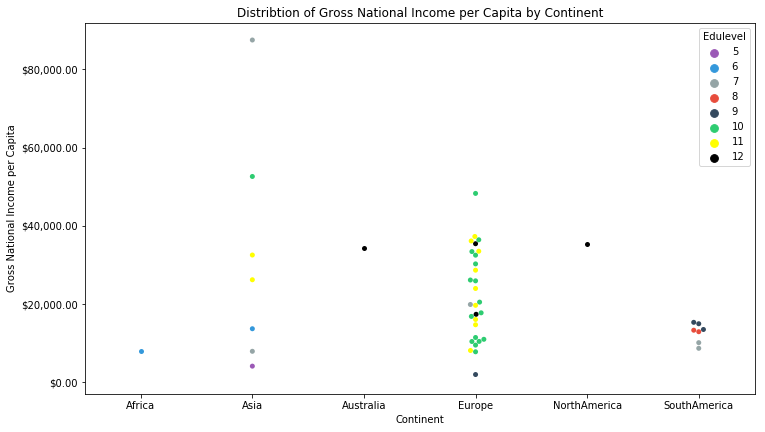

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


fig = plt.figure(1)
fig.set_figheight(15)
fig.set_figwidth(12)

ax = fig.add_subplot(2,1,1)

format = '${x:,.2f}'
tick = mtick.StrMethodFormatter(format)
ax.yaxis.set_major_formatter(tick) 


colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#ffff00","#000000"]
a=sns.swarmplot(x='CONTINENT', y='GNI_PC',hue='Edulevel', data=undata_final.iloc[:,[4,7,8]],palette=colors,ax=ax)
a.set(xlabel='Continent',ylabel='Gross National Income per Capita')
a.set_title("Distribtion of Gross National Income per Capita by Continent")

fig.show